
# explanation and goal of project


# import libraries

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons
from sklearn import datasets
import random
from IPython.display import set_matplotlib_formats
from sklearn.neighbors import kneighbors_graph
set_matplotlib_formats('svg', 'pdf')

initialize hyperparameter

In [ ]:
n = 1000
n_labeled = 10
alpha = 0.99
sigma = 0.1
gamma=0.001
k = 7 

#create database 
here i create database of moons and then show the shape and one sample from them 

In [ ]:
X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=None)
X.shape , Y.shape , X[0] , Y[0]

((1000, 2), (1000,), array([0.51233624, 0.70685862]), 0)

In [ ]:
print(X)
print(Y)

[[ 0.51233624  0.70685862]
 [ 0.25498865  1.09407026]
 [ 0.08795606  0.16680273]
 ...
 [ 1.36855278 -0.51458787]
 [ 1.46507266 -0.38942606]
 [ 1.04971741 -0.05054994]]
[0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 

# make database unbalance
in this part, I delete the number of the sample that belong to class 1 and their value in x dimension bigger than one that I assume as the border that deletes half of my class 1 moon 

In [ ]:
for l in reversed(range(Y.shape[0])):
  if Y[l]==1 and X[l,0]>1:
    n=n-1
    X=np.delete(X,l,0)
    Y=np.delete(Y,l)

# add init label of classes or not labeled to samples
we get `n_labeled` first sample of Y by `Y[:n_labeled,None]` if we don't use None then the result shape become (10,) but by use None it become (10,1) and make it column of number 0 or 1 instead of row of 0 or 1

the result of this code for 10 sample  `Y[:n_labeled,None]==np.arange(2)` is :


```
[[ True False]                     
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]
 [ True False]]
 ```
while `Y[:n_labeled,None]` is:


```
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
 ```

so if Y[i]==0 first parameter become True and second one become oposite of it and False and if Y[i]==1 first parameter become False and second one become oposite of it and True.

by add `.astype(float))` change this True and false to 0 and 1


```
(Y[:n_labeled,None] == np.arange(2)).astype(float):

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
```
and then labeled other sample by code below:


```
np.zeros((n-n_labeled,2)):

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])
```

so if the sample has not label it become [0,0] and if it has label and label is belonge to class 1 it become [1,0] or if belonge to class 0 it become [0,1]

In [ ]:
Y_input = np.concatenate(((Y[:n_labeled,None] == np.arange(2)).astype(float), np.zeros((n-n_labeled,2))))

In [ ]:
Y_input.shape

(754, 2)

# colorize and plot modify database
now at first for sample type we define color :

*   green for supervised sample class 1
*   yellow for supervised sample class 0
*   red for sample that algorithm labeling as class 0
*   blue for sample that algorithm labeling as class 1

and then plot it



In [ ]:
color=list()
for i in range(Y.shape[0]):
  if Y_input[i,0]==0 and Y_input[i,1]==0:
    if Y[i]==0:
      color.append('red')
    elif Y[i]==1:
      color.append('blue')
  if Y_input[i,0]==1:
    color.append('green')
  if Y_input[i,1]==1:
    color.append('yellow')

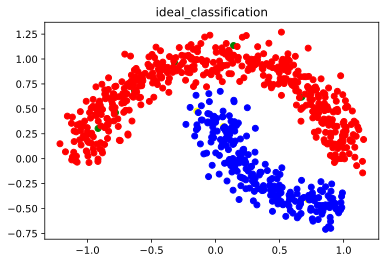

In [ ]:
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.title("ideal_classification")
plt.savefig("ideal_classification.pdf", format='pdf')
plt.show()

# calculate  euclidean distance between nodes and W base on below formule:
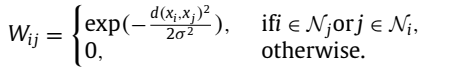


In [ ]:
dm = cdist(X, X, 'euclidean')
rbf = lambda x, sigma: math.exp((-x**2)/(2*(math.pow(sigma,2))))
vfunc = np.vectorize(rbf)
W = vfunc(dm, sigma)
np.fill_diagonal(W, 0)

In [ ]:
A = kneighbors_graph(X, k, mode='connectivity', include_self=True)
A.toarray()
A=scipy.sparse.csr_matrix.toarray(A)
W=np.multiply(W,A)

In [ ]:
def calculate_D(W):
  d=np.sum(W,axis=1)
  """A=np.zeros([len(d),len(d)])
  for i in range(len(d)):
    A[i,i]=d[i]"""
  A=np.diag(np.sum(W,axis=1))
  return d,A

In [ ]:
d,D=calculate_D(W)

In [ ]:
D.shape , Y_input.shape , d.shape

((754, 754), (754, 2), (754,))

In [ ]:
inverse_w = np.linalg.inv(D)
inverse_w.shape

(754, 754)

# calculate P and L and G:

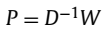




image.png


In [ ]:
def calculate_P_L(D,W):
  d = np.sum(W, axis=1)
  pi=(d/np.sum(d))
  pi = pi.reshape((1,pi.shape[0]))
  print("pi shape:",pi.shape)
  P=np.dot(np.linalg.inv(D),W)
  print(D)
  print(np.linalg.inv(D))
  G=np.matmul(np.ones((pi.shape[1] , 1)),pi)
  return P,D-W,G


In [ ]:
P,L,G=calculate_P_L(D,W)
P.shape , G

pi shape: (1, 754)
[[4.80823325 0.         0.         ... 0.         0.         0.        ]
 [0.         4.67933436 0.         ... 0.         0.         0.        ]
 [0.         0.         5.09871591 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 4.89022916 0.         0.        ]
 [0.         0.         0.         ... 0.         5.49414897 0.        ]
 [0.         0.         0.         ... 0.         0.         5.33961956]]
[[0.2079766  0.         0.         ... 0.         0.         0.        ]
 [0.         0.21370561 0.         ... 0.         0.         0.        ]
 [0.         0.         0.19612781 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.20448939 0.         0.        ]
 [0.         0.         0.         ... 0.         0.18201181 0.        ]
 [0.         0.         0.         ... 0.         0.         0.18727926]]


((754, 754),
 array([[0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685],
        [0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685],
        [0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685],
        ...,
        [0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685],
        [0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685],
        [0.00125784, 0.00122412, 0.00133383, ..., 0.00127929, 0.00143727,
         0.00139685]]))

#initilize F by formule of below and plot it :
 image.png

In [ ]:
# F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input
F=np.dot(np.linalg.inv(D),Y_input)

Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

In [ ]:
F.shape , G.shape

((754, 2), (754, 754))

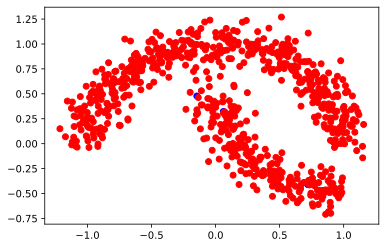

In [ ]:
color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_n.pdf", format='pdf')
plt.show()

# after one time iteration run code

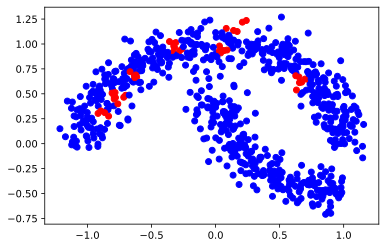

In [ ]:
F = np.dot(P, F) +(-gamma)*np.dot(G, F) +gamma*np.dot(np.linalg.inv(D),Y_input)
Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_n.pdf", format='pdf')
plt.show()

# after n_iter time itration run algorithm

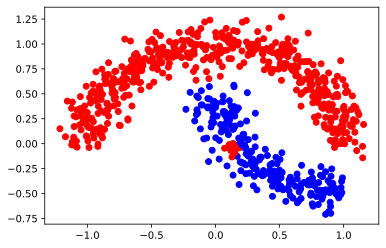

In [ ]:
n_iter = 2000
for t in range(n_iter):
  # F = np.dot(P, F) - np.dot(G, F)*gamma + gamma*np.dot(diagonal_power(D,-1),Y_input)
  F = np.dot(P, F) +(-gamma)*np.dot(G, F) +gamma*np.dot(np.linalg.inv(D),Y_input)
  # F = np.dot(S, F)*alpha + (1-alpha)*Y_input

Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_n.pdf", format='pdf')
plt.show()

this method have predict other sample with high accurcy Despite that all supervised labeled sample are from one class(red color) and not from another class (blue color)